# Part I : end-to-end machine learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
# 실습용 파일 다운로드

from urllib import request

url = "https://raw.githubusercontent.com/jehyunlee/2021_KSES_ML/main/penguins_kses.csv"
savename = "data.csv"

request.urlretrieve(url, savename)

('data.csv', <http.client.HTTPMessage at 0x7fbce7fd4d90>)

In [3]:
# 실습용 파일 열기

df = pd.read_csv("data.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,Female,1377
1,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,Male,1379
2,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,Female,1199
3,Chinstrap,Dream,52.8,20.0,205.0,4550.0,Male,1167
4,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,Female,1529


In [4]:
# 일단 머신러닝

In [5]:
# target feature
y = df["body_mass_g"]

# input features
X = df.drop(["body_mass_g", "id"], axis=1)
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Gentoo,Biscoe,45.1,14.4,210.0,Female
1,Gentoo,Biscoe,46.4,15.6,221.0,Male
2,Gentoo,Biscoe,46.5,13.5,210.0,Female
3,Chinstrap,Dream,52.8,20.0,205.0,Male
4,Gentoo,Biscoe,45.5,13.7,214.0,Female


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [7]:
# 머신러닝 모델 : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# 학습: 인코딩 에러 발생
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Adelie'

In [8]:
X_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
167,Adelie,Biscoe,35.30,18.9,187.0,Female
122,Chinstrap,Dream,50.50,19.6,201.0,Male
301,Gentoo,Biscoe,49.10,15.0,228.0,Male
676,Gentoo,Biscoe,46.30,15.8,215.0,Male
607,Adelie,Biscoe,3.77,18.7,180.0,Male


In [9]:
# categorical features one-hot encoding
X_train = pd.get_dummies(X_train)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
167,35.30,18.9,187.0,1,0,0,1,0,0,1,0
122,50.50,19.6,201.0,0,1,0,0,1,0,0,1
301,49.10,15.0,228.0,0,0,1,1,0,0,0,1
676,46.30,15.8,215.0,0,0,1,1,0,0,0,1
607,3.77,18.7,180.0,1,0,0,1,0,0,0,1


In [10]:
# 다시 학습 : 결측치 에러 발생

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [11]:
# 학습데이터 X 결측치 확인

X_train.isnull().sum()

bill_length_mm       3
bill_depth_mm        3
flipper_length_mm    3
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [12]:
X_train.loc[X_train["bill_length_mm"].isnull()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
508,NaN,NaN,NaN,0,0,1,1,0,0,0,0
524,NaN,NaN,NaN,1,0,0,0,0,1,0,0
702,NaN,NaN,NaN,0,0,1,1,0,0,0,0


In [13]:
# 결측치 제거

X_train = X_train.dropna()
X_train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [14]:
# 다시 학습 시도 : 또 결측치

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
# y 인자 결측치 확인

y_train.isnull().sum()

3

In [16]:
y_train.loc[y_train.isnull()]

508   NaN
524   NaN
702   NaN
Name: body_mass_g, dtype: float64

In [17]:
# y 인자 결측치 제거

y_train = y_train.dropna()
y_train.isnull().sum()

0

In [18]:
# 다시 학습

rf.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# 예측 : 에러 - categorical feature
y_pred_test = rf.predict(X_test)

ValueError: could not convert string to float: 'Gentoo'

In [20]:
# one-hot encoding

X_test = pd.get_dummies(X_test)
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
534,47.4,14.6,212.0,0,0,1,1,0,0,1,0
610,45.0,15.4,220.0,0,0,1,1,0,0,0,1
377,39.5,16.7,178.0,1,0,0,0,1,0,1,0
250,45.2,14.8,212.0,0,0,1,1,0,0,1,0
310,46.3,15.8,215.0,0,0,1,1,0,0,0,1


In [21]:
X_test = X_test.dropna()
X_test.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [22]:
# 머신러닝 예측 (1) 학습 데이터

y_train_pred = rf.predict(X_train)

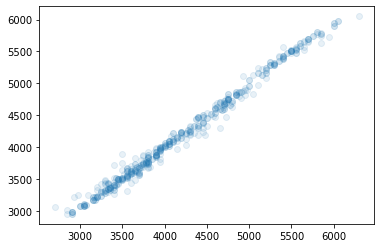

In [23]:
# 예측 결과 시각화
plt.scatter(y_train, y_train_pred, alpha=0.1)

In [24]:
# 정확도 확인

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print(f"# R2_train = {r2_train}")

# R2_train = 0.9902042433825042


In [25]:
# 머신러닝 예측 (2) 테스트 데이터

y_test_pred = rf.predict(X_test)

ValueError: x and y must be the same size

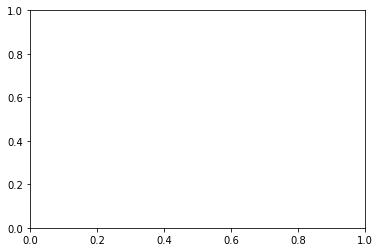

In [26]:
# 예측 결과 시각화 : 데이터 수 불일치
plt.scatter(y_test, y_test_pred, alpha=0.1)

In [28]:
print(y_test.shape, y_test_pred.shape)

(216,) (215,)


In [30]:
set(y_test.index) - set(X_test.index)

{209}

In [31]:
y_test = y_test.drop(index=209)

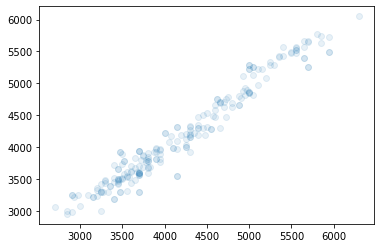

In [32]:
plt.scatter(y_test, y_test_pred, alpha=0.1)

In [33]:
# 정확도 확인

r2_test = r2_score(y_test, y_test_pred)
print(f"# R2_test = {r2_test}")

# R2_test = 0.950421722355637


In [34]:
# 인자 중요도

fi = rf.feature_importances_
fi

array([0.04547141, 0.04612345, 0.09500584, 0.00080094, 0.00124392,
       0.62020921, 0.0035933 , 0.00237216, 0.00196841, 0.02101876,
       0.1621926 ])

<BarContainer object of 11 artists>

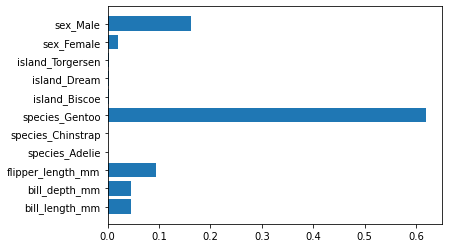

In [35]:
plt.barh(X_train.columns, fi)

In [36]:
# noise 섞기

X_train["noise"] = np.random.random(size=X_train.shape[0])
X_test["noise"] = np.random.random(size=X_test.shape[0])
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,noise
167,35.30,18.9,187.0,1,0,0,1,0,0,1,0,0.823791
122,50.50,19.6,201.0,0,1,0,0,1,0,0,1,0.305151
301,49.10,15.0,228.0,0,0,1,1,0,0,0,1,0.307543
676,46.30,15.8,215.0,0,0,1,1,0,0,0,1,0.201323
607,3.77,18.7,180.0,1,0,0,1,0,0,0,1,0.265165


In [37]:
# 다시 머신러닝, 정확도, 인자 중요도 확인

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
r2_test_noise = r2_score(y_test, y_test_pred)
print(f"R2_test_noise = {r2_test_noise}")

R2_test_noise = 0.950421722355637


<BarContainer object of 12 artists>

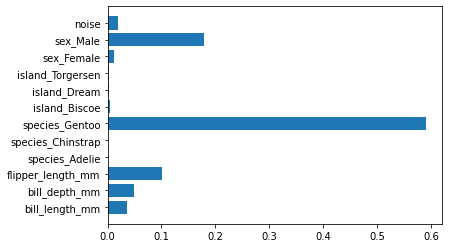

In [35]:
fi_noise = rf.feature_importances_
plt.barh(X_train.columns, fi_noise)

# Part II : Data Preprocessing

## Overview

In [38]:
# 데이터 훑어보기 1. 전체 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            717 non-null    object 
 1   island             717 non-null    object 
 2   bill_length_mm     713 non-null    float64
 3   bill_depth_mm      713 non-null    float64
 4   flipper_length_mm  713 non-null    float64
 5   body_mass_g        713 non-null    float64
 6   sex                695 non-null    object 
 7   id                 717 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 44.9+ KB


In [39]:
# 데이터 훑어보기 2. 데이터 값들

df.describe() # include="all"
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
count,717,717,713.000000,713.000000,713.000000,713.000000,695,717.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male,NaN
freq,317,354,NaN,NaN,NaN,NaN,351,NaN
mean,NaN,NaN,42.316844,17.142216,200.970547,4206.065919,NaN,1507.158996
std,NaN,NaN,9.455892,1.973255,14.117404,804.211736,NaN,295.201588
min,NaN,NaN,3.450000,13.100000,172.000000,2700.000000,NaN,1002.000000
25%,NaN,NaN,38.800000,15.500000,190.000000,3550.000000,NaN,1257.000000
50%,NaN,NaN,43.500000,17.300000,197.000000,4050.000000,NaN,1508.000000
75%,NaN,NaN,48.400000,18.700000,214.000000,4750.000000,NaN,1762.000000


## Cleansing

In [40]:
# 결측치 확인 1. 수
df.isnull().sum()

species               0
island                0
bill_length_mm        4
bill_depth_mm         4
flipper_length_mm     4
body_mass_g           4
sex                  22
id                    0
dtype: int64

In [41]:
# 결측치 확인 2. 행

df.loc[df["body_mass_g"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
209,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1707
508,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1697
524,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1707
702,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1697


In [42]:
df.loc[df["sex"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
106,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,1835
107,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,1625
209,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1707
218,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,1452
236,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,1353
312,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,1835
336,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,1618
482,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,1442
508,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1697
509,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,1442


In [43]:
# 결측치 처리 1. 신체 데이터 결측 - 삭제
df.dropna(subset=["sex"], axis=0, inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,Female,1377
1,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,Male,1379
2,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,Female,1199
3,Chinstrap,Dream,52.8,20.0,205.0,4550.0,Male,1167
4,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,Female,1529
...,...,...,...,...,...,...,...,...
711,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,Male,1823
712,Gentoo,Biscoe,45.2,15.8,215.0,5300.0,Male,1117
713,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,Female,1011
714,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female,1099


In [44]:
# 중복값 확인
df.duplicated(["id"]).sum()

362

In [45]:
df.loc[df.duplicated(["id"])].sort_values("id")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
596,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male,1002
559,Adelie,Dream,35.7,18.0,202.0,3550.0,Female,1003
407,Chinstrap,Dream,50.6,19.4,193.0,3800.0,Male,1007
713,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,Female,1011
606,Chinstrap,Dream,49.0,19.5,210.0,3950.0,Male,1013
...,...,...,...,...,...,...,...,...
316,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1989
473,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,Male,1990
265,Chinstrap,Dream,45.2,16.6,191.0,3250.0,Female,1991
298,Chinstrap,Dream,46.6,17.8,193.0,3800.0,Female,1992


In [46]:
df.query("id == 1144")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
286,Adelie,Dream,40.3,18.5,196.0,4350.0,Male,1144
294,Adelie,Dream,40.3,18.5,196.0,4350.0,Male,1144


In [47]:
# 중복값 처리
df.drop_duplicates(["id"], inplace=True)
df.shape

(333, 8)

<AxesSubplot:xlabel='species', ylabel='count'>

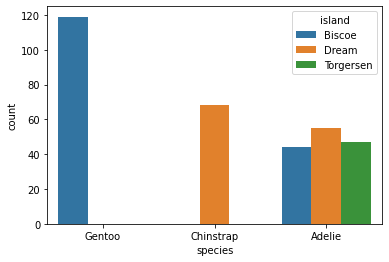

In [48]:
# 데이터 분포 확인 1. categorical features
sns.countplot(x=df["species"], hue=df["island"])

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

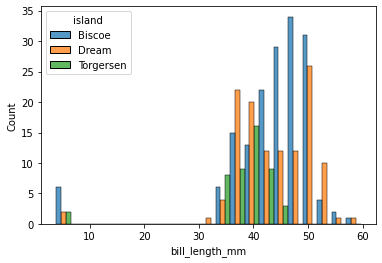

In [49]:
# 데이터 분포 확인 2. numerical features
sns.histplot(x=df["bill_length_mm"], hue=df["island"], multiple="dodge")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

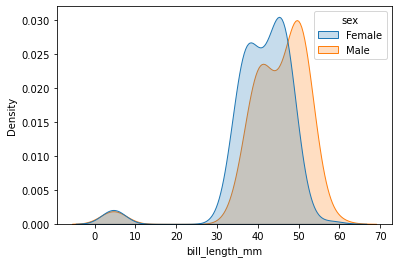

In [50]:
sns.kdeplot(x=df["bill_length_mm"], hue=df["sex"], fill=True)

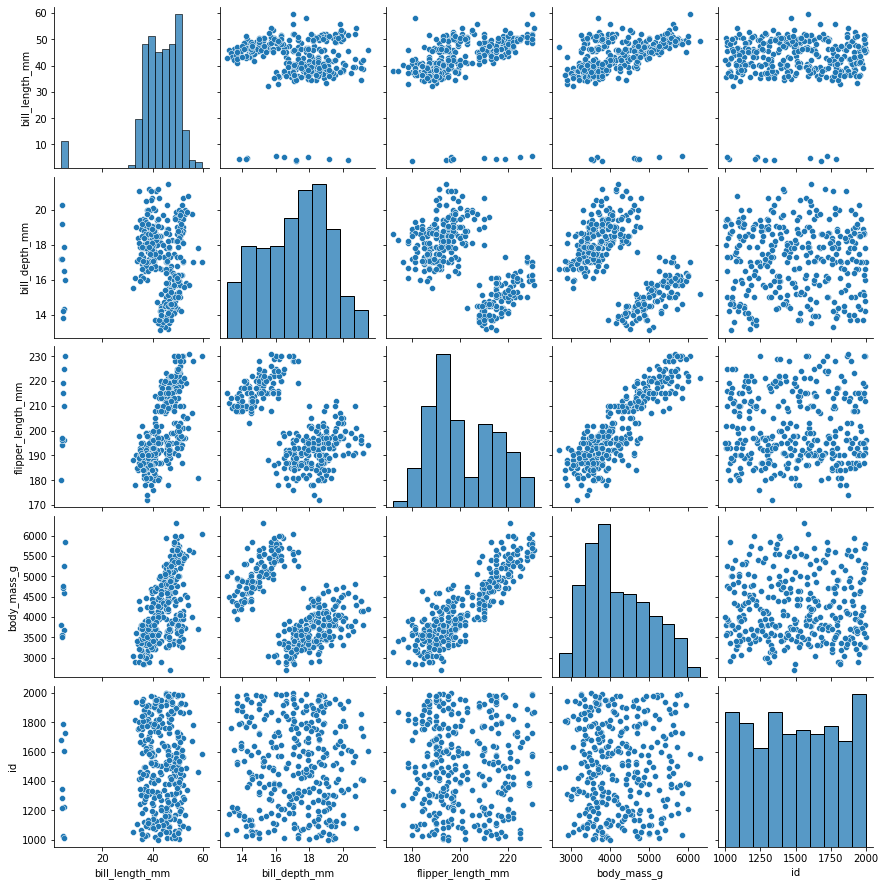

In [51]:
# 데이터 이상치 확인

sns.pairplot(df)

In [54]:
df.query("bill_length_mm < 20")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
14,Gentoo,Biscoe,4.82,14.3,210.0,4600.0,Female,1605
84,Adelie,Dream,4.13,20.3,194.0,3550.0,Male,1347
99,Adelie,Biscoe,3.88,17.2,180.0,3800.0,Male,1682
123,Gentoo,Biscoe,5.51,16.0,230.0,5850.0,Male,1724
194,Gentoo,Biscoe,4.58,14.2,219.0,4700.0,Female,1028
255,Gentoo,Biscoe,4.52,13.8,215.0,4750.0,Female,1785
262,Chinstrap,Dream,5.09,17.9,196.0,3675.0,Female,1223
306,Adelie,Torgersen,3.96,17.2,196.0,3550.0,Female,1283
343,Adelie,Torgersen,4.31,19.2,197.0,3500.0,Male,1215
664,Gentoo,Biscoe,5.11,16.5,225.0,5250.0,Male,1016


In [55]:
df.query("body_mass_g == 3550.0")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
30,Chinstrap,Dream,50.90,19.1,196.0,3550.0,Male,1107
82,Adelie,Dream,35.70,18.0,202.0,3550.0,Female,1003
84,Adelie,Dream,4.13,20.3,194.0,3550.0,Male,1347
175,Adelie,Biscoe,40.60,18.6,183.0,3550.0,Male,1388
306,Adelie,Torgersen,3.96,17.2,196.0,3550.0,Female,1283
409,Adelie,Biscoe,39.00,17.5,186.0,3550.0,Female,1787
496,Adelie,Torgersen,36.20,16.1,187.0,3550.0,Female,1448
521,Adelie,Dream,42.20,18.5,180.0,3550.0,Female,1096
592,Adelie,Biscoe,39.70,18.9,184.0,3550.0,Male,1196


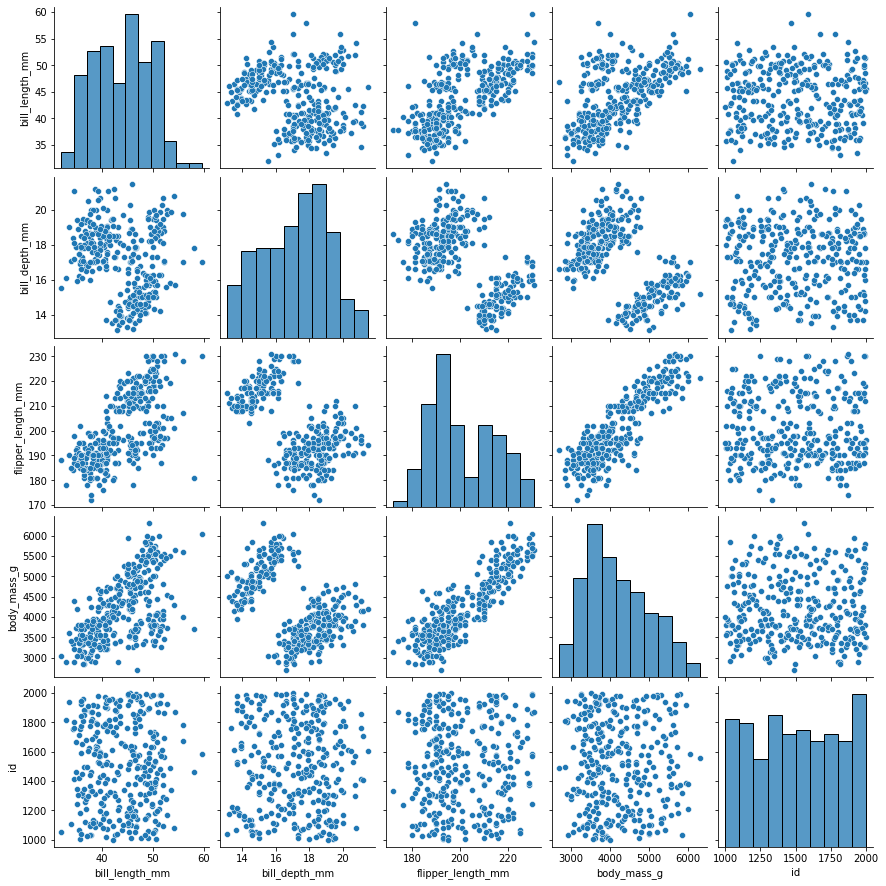

In [56]:
sns.pairplot(df.query("bill_length_mm > 20"))

In [57]:
df = df.drop(index=df.query("bill_length_mm < 20").index)

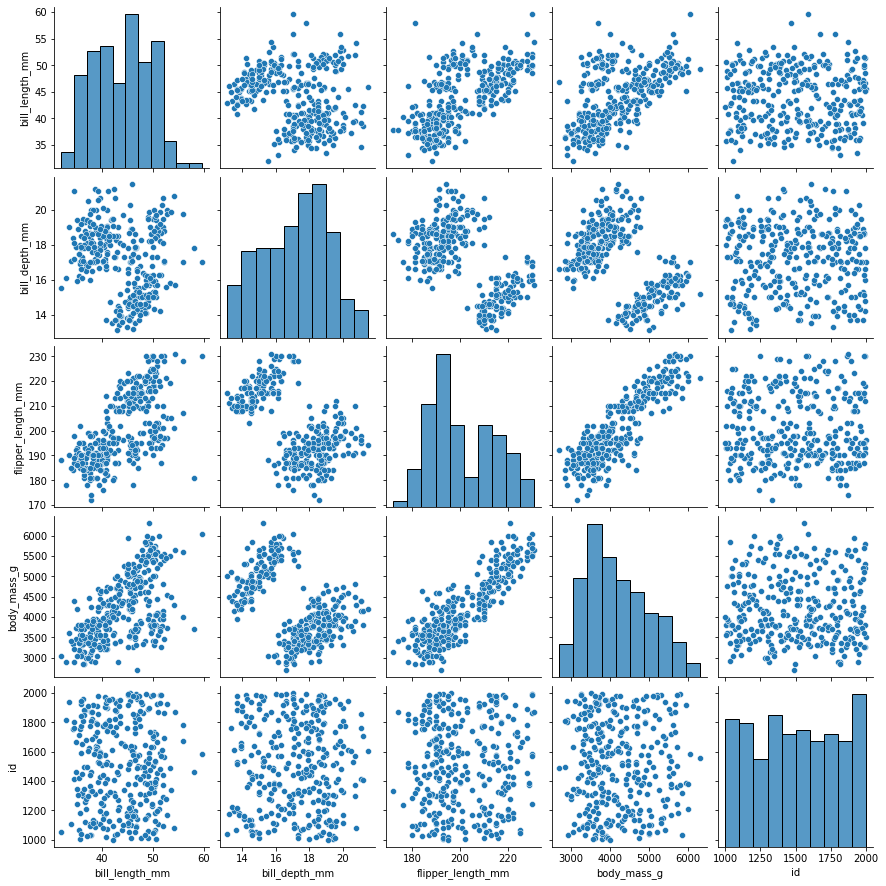

In [58]:
sns.pairplot(df)

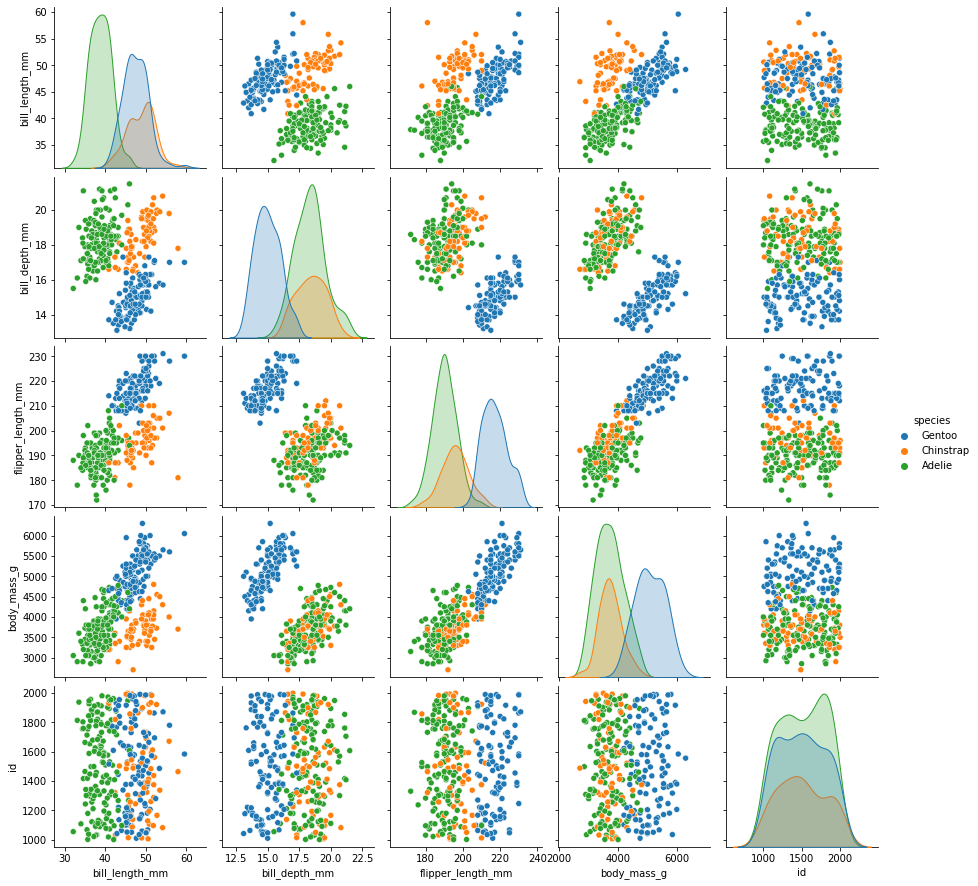

In [59]:
sns.pairplot(df, hue="species")

## Data Preparation

In [60]:
df.shape

(323, 8)

In [61]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex", "species", "island"]]
y = df["body_mass_g"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'testset')

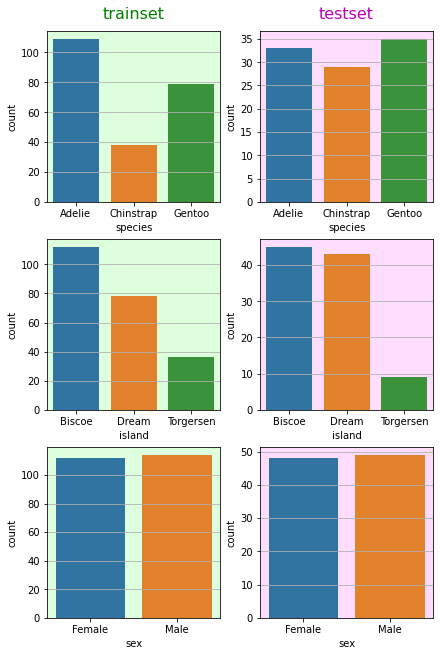

In [63]:
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(6,9), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[:, 0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")
    ax.grid(axis="y")

for ax, col in zip(axes[:, 1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    ax.grid(axis="y")

axes[0, 0].set_title("trainset", fontsize=16, color="g", pad=12)
axes[0, 1].set_title("testset", fontsize=16, color="m", pad=12)

In [91]:
# stratified sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X[["species", "island", "sex"]])

Text(0.5, 1.0, 'testset')

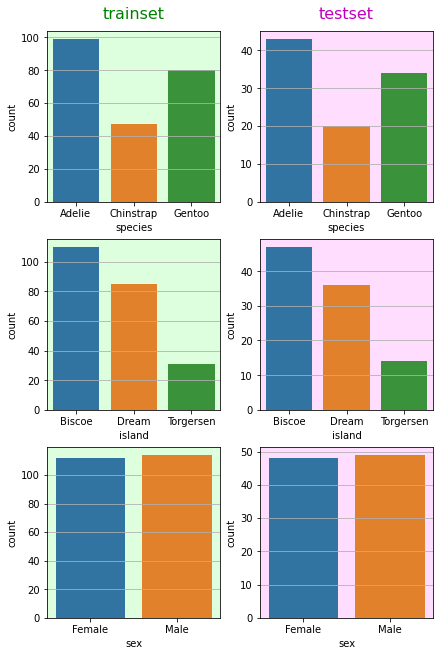

In [66]:
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(6,9), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[:, 0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")
    ax.grid(axis="y")

for ax, col in zip(axes[:, 1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    ax.grid(axis="y")
    
axes[0, 0].set_title("trainset", fontsize=16, color="g", pad=12)
axes[0, 1].set_title("testset", fontsize=16, color="m", pad=12)

## Machine Learning (1) get_dummies

In [67]:
X_train_1 = pd.get_dummies(X_train)
X_train_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_Female,sex_Male,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
73,38.8,20.0,190.0,0,1,1,0,0,0,1,0
37,34.4,18.4,184.0,1,0,1,0,0,0,0,1
351,49.0,19.5,210.0,0,1,0,1,0,0,1,0
7,45.1,14.5,207.0,1,0,0,0,1,1,0,0
206,51.7,20.3,194.0,0,1,0,1,0,0,1,0


In [68]:
rf = RandomForestRegressor()
rf.fit(X_train_1, y_train)

RandomForestRegressor()

In [69]:
y_train_pred = rf.predict(X_train_1)

X_test_1 = pd.get_dummies(X_test)
y_test_pred = rf.predict(X_test_1)

In [70]:
print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.9800729618691841
# R2_test = 0.8404519456752515


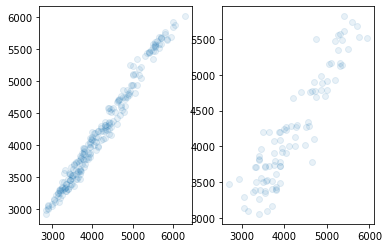

In [71]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred, alpha=0.1)
axs[1].scatter(y_test, y_test_pred, alpha=0.1)

<BarContainer object of 11 artists>

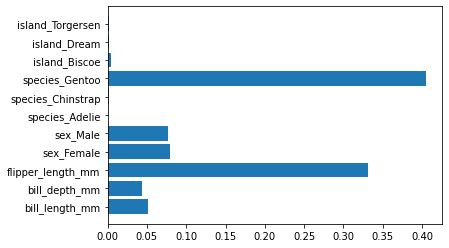

In [72]:
fi = rf.feature_importances_
plt.barh(X_train_1.columns, fi)

## Machine Learning (2) pipeline

In [75]:
# encoder
from sklearn.preprocessing import OneHotEncoder

# machine learning models
from sklearn.ensemble import RandomForestRegressor

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# data split
from sklearn.model_selection import train_test_split

In [93]:
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder(sparse=False)

num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
num_transformer = 'passthrough'

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                               ("cat", cat_transformer, cat_features)])

model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("rf", RandomForestRegressor())])

In [94]:
from sklearn import set_config

set_config(display='diagram') 
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['species', 'island',
                                                   'sex'])])),
                ('rf', RandomForestRegressor())])

In [98]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [104]:
print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.9796419851761248
# R2_test = 0.8420196434731915


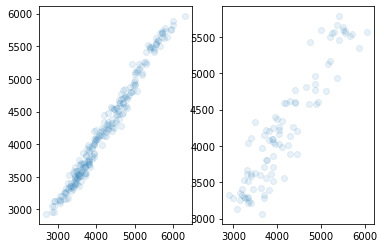

In [105]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred, alpha=0.1)
axs[1].scatter(y_test, y_test_pred, alpha=0.1)

In [107]:
# permutation importance

from sklearn.inspection import permutation_importance

pi = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=2021)

<BarContainer object of 6 artists>

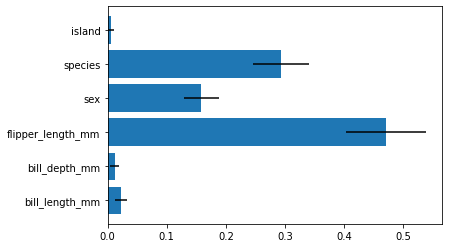

In [113]:
plt.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)